https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


In [2]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)


In [3]:
raw_data.head

<bound method NDFrame.head of           WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  TARGET CLA

In [4]:
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

Since the K nearest neighbors algorithm makes predictions about a data point by using the observations that are closest to it, the scale of the features within a data set matters a lot.

Because of this, machine learning practitioners typically standardize the data set, which means adjusting every x value so that they are roughly on the same scale.

Fortunately, scikit-learn includes some excellent functionality to do this with very little headache.

To start, we will need to import the StandardScaler class from scikit-learn. Add the following command to your Python script to do this:

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)


In [9]:
x = scaled_data
y = raw_data['TARGET CLASS']

In [10]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Next, let’s create an instance of the KNeighborsClassifier class and assign it to a variable named model

This class requires a parameter named n_neighbors, which is equal to the K value of the K nearest neighbors algorithm that you’re building. To start, let’s specify n_neighbors = 1:

In [11]:
model = KNeighborsClassifier(n_neighbors = 40)


In [12]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [13]:
predictions = model.predict(x_test_data)

In [14]:

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       138
           1       0.93      0.96      0.94       162

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



In [15]:
print(confusion_matrix(y_test_data, predictions))

[[126  12]
 [  7 155]]


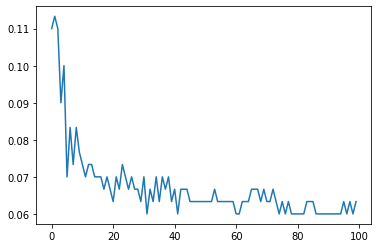

In [16]:
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))
plt.plot(error_rates)

Here is a brief summary of what you learned about K-nearest neighbors models in Python:

How classified data is a common tool used to teach students how to solve their first K nearest neighbor problems
Why it’s important to standardize your data set when building K nearest neighbor models
How to split your data set into training data and test data using the train_test_split function
How to train your first K nearest neighbors model and make predictions with it
How to measure the performance of a K nearest neighbors model
How to use the elbow method to select an optimal value of K in a K nearest neighbors model

In [31]:
item=100
raw_data.iloc[item].tolist()


[0.6177235005404365,
 1.4481308317946695,
 1.1689553821252758,
 0.8104920402352481,
 0.8918620003373076,
 1.2146935790818565,
 1.2083378506169928,
 1.428691026905144,
 0.9757826977952909,
 1.5504815650390733,
 0.0]

In [32]:
datapoint=scaled_data.iloc[item].tolist()
predicted= model.predict([datapoint])
print(predicted)

[0]


[1]
